In [19]:
#@title Librerias

import numpy as np # Númerica
import math as mt
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, interp1d, lagrange, CubicHermiteSpline # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica
import pandas as pd
from numpy.polynomial.polynomial import Polynomial

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre: Edgar Junior Córdoba Gamboa

*Identificación: 1.004.012.619

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



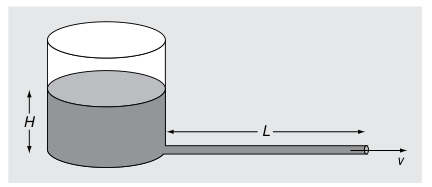

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


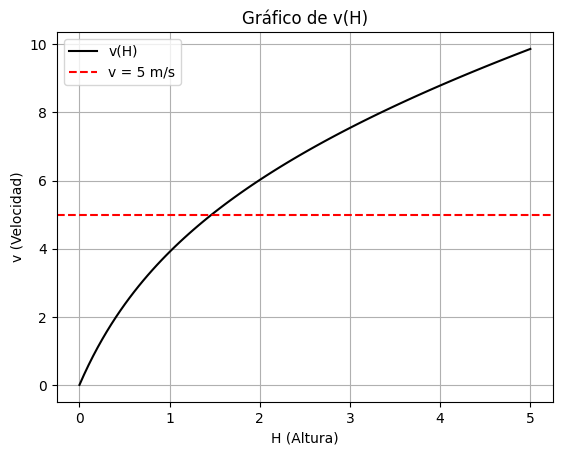

El valor de H obtenido con el método de Bisección es: 1.4658946529030796
El valor de H obtenido con el método de Newton es: 1.465894588476788
El error relativo entre ambos métodos es: 4.395015312928478e-08


In [31]:
# Definimos la función de velocidad
def vd(H, g, L, t):
    r = np.sqrt(2 * g * H)
    v = r * np.tanh(r * t / (2 * L))
    return v

g = 9.81
L = 4
t = 2.5

# Punto b
H_inter = np.linspace(0, 5, 100)
valores = vd(H_inter, g, L, t)

plt.plot(H_inter, valores, label='v(H)', color='black')
plt.axhline(y=5, color='red', linestyle='dashed', label='v = 5 m/s')
plt.xlabel('H (Altura)')
plt.ylabel('v (Velocidad)')
plt.title('Gráfico de v(H)')
plt.legend()
plt.grid()
plt.show()

# Punto c
def f(H):
    return vd(H, g, L, t) - 5

# Punto d
def Biseccion(f, a, b, tol=1e-7):
    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# Aplicamos el método de Bisección
H_biseccion = Biseccion(f, 0.1, 5)

# Punto e
H_newton = newton(f, x0=2)

# Cálculo del error relativo
error_relativo = abs(H_biseccion - H_newton) / abs(H_newton)

print("El valor de H obtenido con el método de Bisección es:", H_biseccion)
print("El valor de H obtenido con el método de Newton es:", H_newton)
print("El error relativo entre ambos métodos es:", error_relativo)


# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




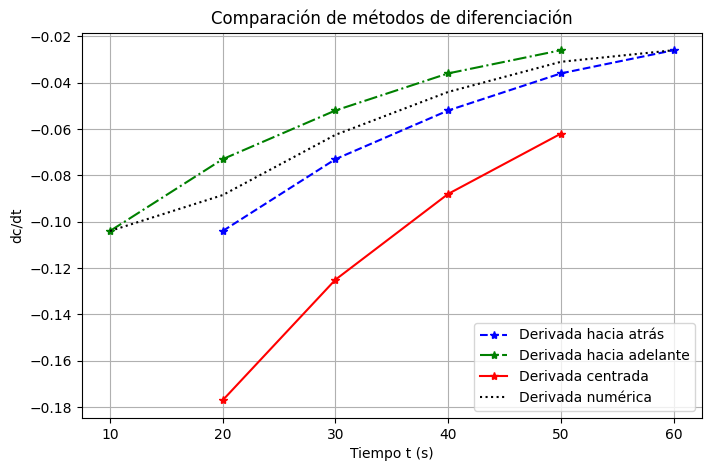

Valores obtenidos: k ≈ 0.0377, n ≈ 0.8506


In [8]:
# Punto A
v1 = {'t': [10, 20, 30, 40, 50, 60], 'c': [3.52, 2.48, 1.75, 1.23, 0.87, 0.61]}
t_ = v1['t']
c_ = v1['c']

# Regresión hacia atrás
def r_t(x, y):
    return np.array([(y[i] - y[i-1]) / (x[i] - x[i-1]) for i in range(1, len(x))])

# Regresión hacia adelante
def r_a(x, y):
    return np.array([(y[i+1] - y[i]) / (x[i+1] - x[i]) for i in range(len(x)-1)])

# Regresión centrada
def r_c(x, y):
    return np.array([(y[i+1] - y[i-1]) / (x[i+1] - x[i]) for i in range(1, len(x)-1)])

df_t = np.append(np.nan, r_t(t_, c_))
df_a = np.append(r_a(t_, c_), np.nan)
df_c = np.append(np.nan, np.append(r_c(t_, c_), np.nan))

grad = np.gradient(c_, t_)

# Punto B
plt.figure(figsize=(8, 5))
plt.plot(t_, df_t, label='Derivada hacia atrás', marker='*', linestyle='--', color='b')
plt.plot(t_, df_a, label='Derivada hacia adelante', marker='*', linestyle='-.', color='g')
plt.plot(t_, df_c, label='Derivada centrada', marker='*', linestyle='-', color='r')
plt.plot(t_, grad, label='Derivada numérica', linestyle=':', color='k')
plt.xlabel('Tiempo t (s)')
plt.ylabel('dc/dt')
plt.title('Comparación de métodos de diferenciación')
plt.legend()
plt.grid()
plt.show()

# Punto C
log_c = np.log(c_)
log_dc_dt = np.log(-grad)

slope, intercept, r_value, p_value, std_err = linregress(log_c, log_dc_dt)
k = np.exp(intercept)
n = slope
print(f"Valores obtenidos: k ≈ {k:.4f}, n ≈ {n:.4f}")


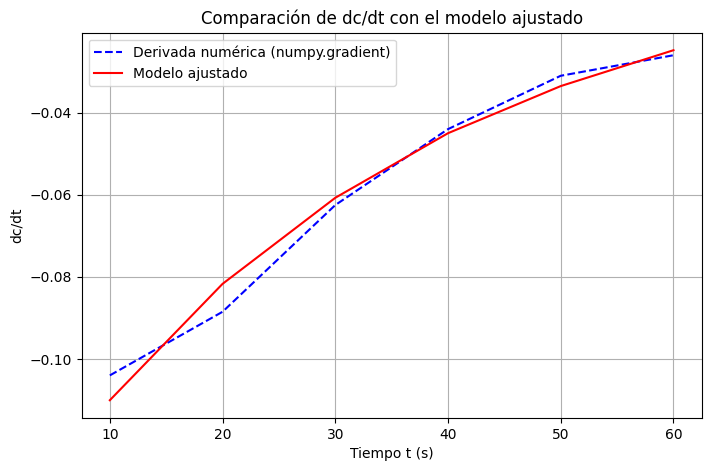

Error máximo en la comparación: 0.0068


In [6]:
#Punto D
dc_dt_md = -k * c_**n
error_max = np.max(np.abs(dc_dt_md - grad))

plt.figure(figsize=(8, 5))
plt.plot(t_, grad, label='Derivada numérica', linestyle='--', color='b')
plt.plot(t_, dc_dt_md, label='Ajuste', linestyle='-', color='r')
plt.xlabel('Tiempo t (s)')
plt.ylabel('dc/dt')
plt.title('Comparación de dc/dt con el Ajuste')
plt.legend()
plt.grid()
plt.show()

print(f"Error máximo en la comparación: {error_max:.4f}")

# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




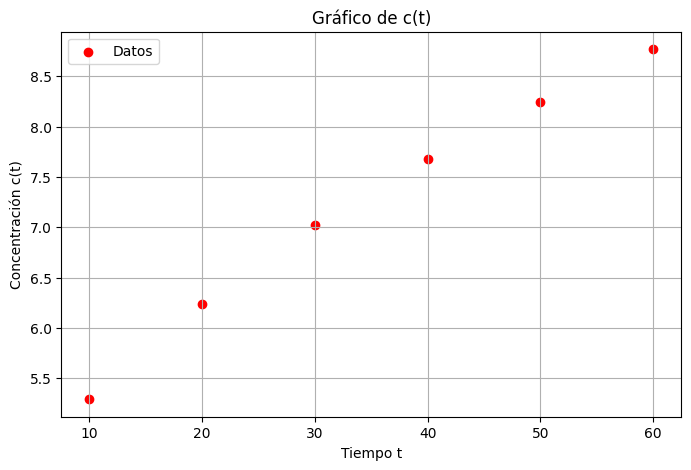

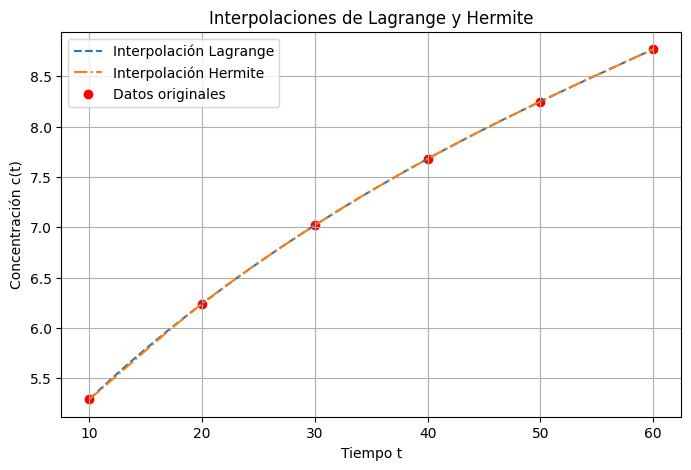

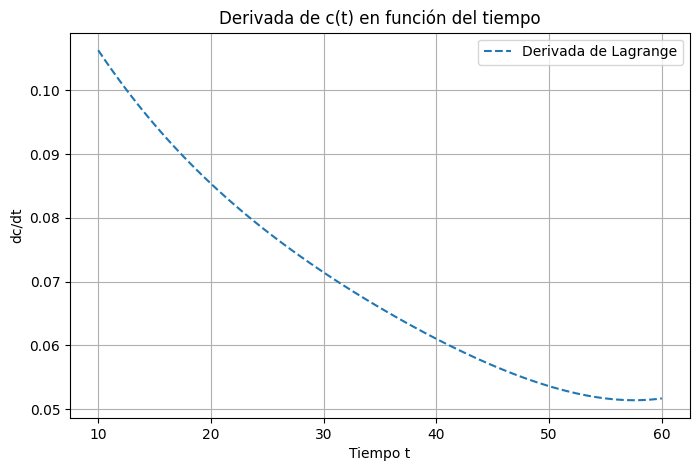

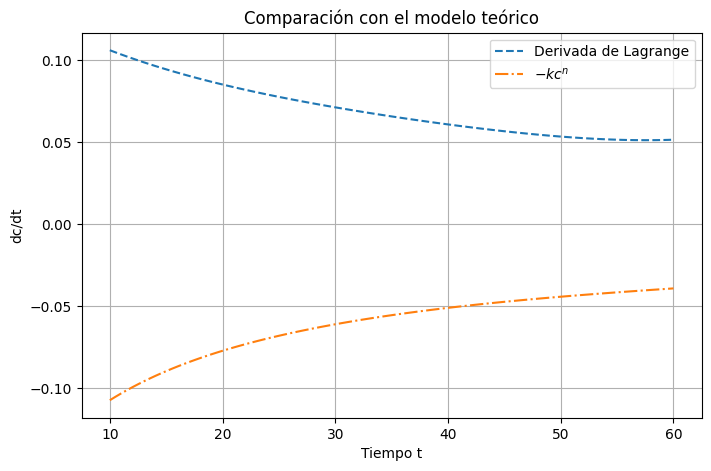

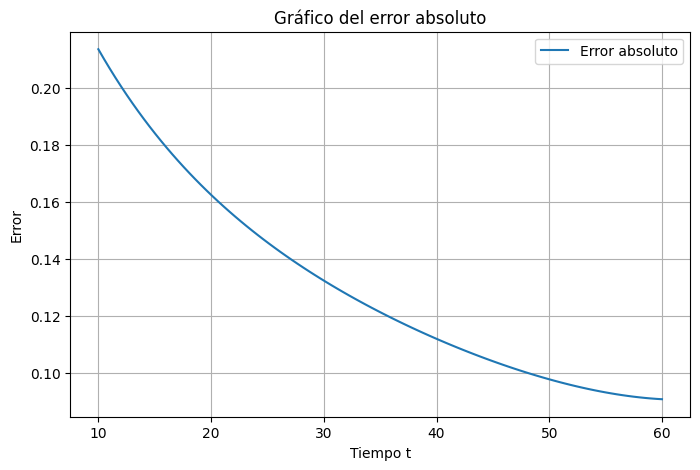

In [33]:
v = {'t': [10, 20, 30, 40, 50, 60],'c': [5.29, 6.24, 7.02, 7.68, 8.25, 8.77]}

x = v['t']
y = v['c']
# a) Graficar c(t)
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color='red', label='Datos')
plt.xlabel('Tiempo t')
plt.ylabel('Concentración c(t)')
plt.title('Gráfico de c(t)')
plt.legend()
plt.grid()
plt.show()

# b) Interpolación de Lagrange y Hermite
poly_lagrange = lagrange(x, y)

# Derivadas numéricas aproximadas para Hermite
c_prima = np.gradient(y, x)
poly_Hermite = CubicHermiteSpline(x, y, c_prima)

# Graficar interpolaciones
t_ = np.linspace(10, 60, 100)
c_lagrange = poly_lagrange(t_)
c_hermite = poly_Hermite(t_)

plt.figure(figsize=(8, 5))
plt.plot(t_, c_lagrange, label='Interpolación Lagrange', linestyle='--')
plt.plot(t_, c_hermite, label='Interpolación Hermite', linestyle='-.')
plt.scatter(x, y, color='red', label='Datos originales')
plt.xlabel('Tiempo t')
plt.ylabel('Concentración c(t)')
plt.title('Interpolaciones de Lagrange y Hermite')
plt.legend()
plt.grid()
plt.show()

# c) Derivada del polinomio de Lagrange
poly_coef = Polynomial(poly_lagrange.coef[::-1])
deri = poly_coef.deriv()

# Graficar dc/dt
dc_dt_lagrange = deri(t_)

plt.figure(figsize=(8, 5))
plt.plot(t_, dc_dt_lagrange, label='Derivada de Lagrange', linestyle='--')
plt.xlabel('Tiempo t')
plt.ylabel('dc/dt')
plt.title('Derivada de c(t) en función del tiempo')
plt.legend()
plt.grid()
plt.show()

# Comparar con la ecuación dada: dc/dt = -k*c^n
k = 3
n = -2
modelo_dc_dt = -k * (c_lagrange ** n)

plt.figure(figsize=(8, 5))
plt.plot(t_, dc_dt_lagrange, label='Derivada de Lagrange', linestyle='--')
plt.plot(t_, modelo_dc_dt, label=r'$-kc^n$', linestyle='-.')
plt.xlabel('Tiempo t')
plt.ylabel('dc/dt')
plt.title('Comparación con el modelo teórico')
plt.legend()
plt.grid()
plt.show()

# d) Error absoluto
error_abs = np.abs(dc_dt_lagrange - modelo_dc_dt)

plt.figure(figsize=(8, 5))
plt.plot(t_, error_abs, label='Error absoluto')
plt.xlabel('Tiempo t')
plt.ylabel('Error')
plt.title('Gráfico del error absoluto')
plt.legend()
plt.grid()
plt.show()